<a href="https://colab.research.google.com/github/mhyls26/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise%204%20/%20Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:

- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as

- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:

- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [132]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [134]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [135]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [136]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [137]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [139]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [140]:
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [141]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [142]:
df_train = df_train.drop_duplicates()

7. Remove rows with NaN values

In [143]:
df_train = df_train.dropna()

8. Convert all text to lowercase

In [144]:
df_train['text'] = df_train['text'].str.lower()

9. Remove digits, URLS and special characters

In [145]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\d+", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    return text
df_train['text'] = df_train['text'].apply(clean_text)

10. Remove stop words

In [146]:
stop_words = set(stopwords.words('english'))
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

11. Use Stemming or Lemmatization

In [147]:
lemmatizer = WordNetLemmatizer()
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df_train['text'].head(5)

,text
0,presidential candidate mar roxas implies govt ...
1,parang may mali na sumunod ang patalastas ng n...
2,bet ko pula ang kulay ng posas
3,username kakampink
4,bakit parang tahimik ang mga pink doc willie o...


## C. Training your model

12. Put all text training data in variable **X_train**

In [148]:
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [149]:
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [150]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [151]:
nb = MultinomialNB()

16. Train the model using `.fit()`

In [152]:
nb.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [153]:
# Validation data
X_validation = df_validation['text']
y_validation = df_validation['label']

# Preprocess validation text
X_validation = X_validation.str.lower().apply(clean_text)
X_validation = X_validation.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_validation = X_validation.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Convert X_validation to its numerical form
X_validation_transformed = vectorizer.transform(X_validation)

# Predictions
y_validation_pred = nb.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [154]:
print("Validation Accuracy:", accuracy_score(y_validation, y_validation_pred))
print("Validation Precision:", precision_score(y_validation, y_validation_pred))
print("Validation Recall:", recall_score(y_validation, y_validation_pred))
print("Validation F1-Score:", f1_score(y_validation, y_validation_pred))

Validation Accuracy: 0.8346428571428571
Validation Precision: 0.8098958333333334
Validation Recall: 0.8791519434628975
Validation F1-Score: 0.8431040325313454


19. Create a confusion matrix using the **validation dataset**

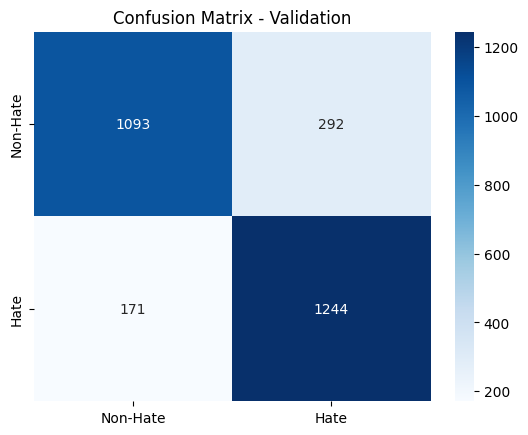

In [155]:
cm_val = confusion_matrix(y_validation, y_validation_pred)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Hate","Hate"], yticklabels=["Non-Hate","Hate"])
plt.title("Confusion Matrix - Validation")
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [156]:
# Test data
X_test = df_test['text']
y_test = df_test['label']

# Preprocess test text
X_test = X_test.str.lower().apply(clean_text)
X_test = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test = X_test.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Convert X_test to its numerical form
X_test_transformed = vectorizer.transform(X_test)

# Predictions
y_test_pred = nb.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [157]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))
print("Test F1-Score:", f1_score(y_test, y_test_pred))

Test Accuracy: 0.8355871886120997
Test Precision: 0.8050847457627118
Test Recall: 0.8834048640915594
Test F1-Score: 0.8424283765347885


22. Create a confusion matrix using the **test dataset**

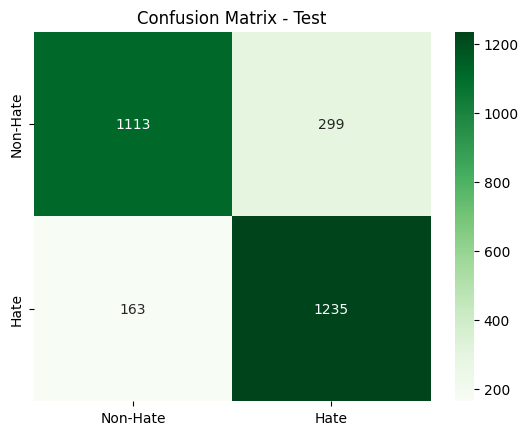

In [158]:
# Create a confusion matrix using the test dataset
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Hate","Hate"], yticklabels=["Non-Hate","Hate"])
plt.title("Confusion Matrix - Test")
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [161]:
def predict_sentence(sentence):
    sentence = sentence.lower()
    sentence = clean_text(sentence)
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])
    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence.split()])
    sentence_transformed = vectorizer.transform([sentence])
    return nb.predict(sentence_transformed)[0]

In [162]:
print("Prediction:", predict_sentence("I love spending time with my family"))

Prediction: 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [163]:
print("Prediction:", predict_sentence("Stupid"))

Prediction: 1
